In [3]:
def find_ratios(list):
    '''take a list of real numbers, express the list as a ratio to the smallest member of the list
        for example: x = [6, 3, 10, 15]
                     find_ratios(x) will return [2, 1, 3.3, 5]

    Parameters
    -------------
    list : type = list - contains entries that are all real numbers

    Returns
    -------------
    normalized list
    '''
    
    n_min = min(list) #TJ find the minimum value in the list to normalize to
    return [x/n_min for x in list] #TJ return the original list, normalized to that smallest area






def get_dots_in_box(box, num_dots=1000000, radians=False):
    '''populates a sphere evenly with dots and selects only those within the box provided
    
    imports neeeded general packages automatically
    requires following functions from parent module "ASTRO5160/Homeworks/HW_2.py":
                        "find_latlong_area()"
                        "evenly_populate_sphere()"
                        "is_it_in()"
    
    Parameters
    -------------
    box : type = list - given in the format [ra_min, ra_max, dec_min, dec_max] with location in degrees
                                                           
    num_dots (optional, defaults to 1,000,000) : type = int - number of dots on entire sphere.     
                                               
    radians (optional, defaults to False): type = boolean - change to True if locations are in radians
    
    Returns
    -------------
    list of [ra,dec] for every dot that is inside the box
    '''
    
    import numpy as np
    if radians == False: #TJ if box isnt already in radians, convert to radians.
        box = np.radians(box)

    #TJ generate random points on a sphere
    ra, dec = evenly_populate_sphere(num_dots)
    all_dots = np.column_stack((ra, dec))  #TJ store as a NumPy array for easier indexing
    
    #TJ generate list of dots that are in box
    in_box = all_dots[is_it_in(all_dots, box)]
    
    
    return in_box

    
def aitoff_plot_region(path, show_plot=True, save_plot=None, radians = False, name = 'bounded_region'):
    '''Plot regions bounded by path with vertices given in ra, dec in degrees (or radians if specified)
        example: box_path = [[0,0], [0,15], [20,15], [10,0]] will plot an assymmetrical trapezoidal box
    
    imports needed packages automatically
    
    Parameters
    -------------
    path : type = list - contains entries for each corner of a closed path
                        all coordinates given in degrees (unless radians = True is specified)
                    
    show_plot (optional, defaults to True) : type = boolean - False will suppress plot output
                string multiple iterations of this function with show_plot = False, then call plt.show() to show 
                all regions in single plot
                    
    save_plot (optional, defaults to None) : type = str - path to directory where plots will be saved to
                             if directory is set to None, output plot will not be saved (can still print to screen)
    
    name (optional, defaults to 'bounded_region'): type = str - name of .png file to save as (if save_plot == True)
                                                                This is also the name of the legend label for the region

    radians (optional, defaults to False): type = boolean - specify whether or not corners are defined in radians or degrees
    
                For example:
                    path1 = [[0,0], [0,15], [20,15], [10,0]]
                    path2 = [[30,30], [30,45], [45,30]]
                    aitoff_plot_region(path1, show_plot=False, save_plot=None, radians = False, name = 'region1')
                    aitoff_plot_region(path2, show_plot=False, save_plot=None, radians = False, name = 'region2')
                    aitoff_plot_region([], show_plot=True, save_plot='C:/Users/tj360/ASTR5160', radians = False, name = 'testing_function')
                    

    
    Returns
    -------------
    Nothing, just used to plot regions
    
    '''
        
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import os
    #TJ the way this function is written makes it difficult to save a plot of multiple regions with an informative title
    #TJ to save a plot like this, call the function with an empty path, and save_plot = True, with name = figure_title
    if path == []: #TJ check that path is not empty, if it is, this is likely just to save a set of plots
        if not save_plot: #TJ this should never happem, print error message
            print('function called with a blank path but save_plot set to False')
            return None
        else: 
            os.makedirs(save_plot, exist_ok=True)  #TJ create the directory if it doesn't exist
            save_path = os.path.join(save_plot, f'{name}.png') #TJ define the full path for saving plot
            plt.savefig(save_path, dpi=300, bbox_inches='tight') #TJ save plot to specified directory
            print(f'output plot saved to {save_plot} as filename = {name}.png')
    else: #TJ if path is not empty, continue with plotting function
        if not radians: #TJ convert to radians for aitoff projection if needed
            path = np.radians(path)
            ra_path = [p[0] for p in path] #TJ define right ascension of corners
            dec_path = [p[1] for p in path] #TJ define declination of corners
            ra_path.append(path[0][0]) #TJ append with first value so the path is closed
            dec_path.append(path[0][1])
        elif radians:
            ra_path = [p[0] for p in path]
            dec_path = [p[1] for p in path]
            ra_path.append(path[0][0])
            dec_path.append(path[0][1])

        if not plt.get_fignums(): #If number of stored figures is zero, create new figure with appropriate axes
            plt.figure(figsize=(8, 5))
            ax = plt.subplot(111, projection="aitoff")
            ax.set_xlabel("Right Ascension", fontsize=12)
            ax.set_ylabel("Declination", fontsize=12)
            ax.set_title("Regions on Sphere", fontsize=12)
            ax.grid(color='black', linestyle='--', linewidth=0.5)
        else:
            ax = plt.gca() #TJ if a plot already exists, then just use that current plot and only add things to it

        #TJ plot the path through all ra,dec corners
        ax.plot(ra_path, dec_path, linestyle='-', linewidth=2, label = name) 
        ax.legend()


        if save_plot != None:
            os.makedirs(save_plot, exist_ok=True)  #TJ create the directory if it doesn't exist
            save_path = os.path.join(save_plot, f'{name}.png') #TJ define the full path for saving plot
            plt.savefig(save_path, dpi=300, bbox_inches='tight') #TJ save plot to specified directory
            print(f'output plot saved to {save_plot} with filename {name}.png') #TJ print if file was saved
        if show_plot:
            plt.show()
    return None


def aitoff_plot_rectangles(boxes, directory, name = 'lat-long box', radians=False):
    '''Plot lat-long rectangles bounded by ra_min, ra_max, dec_min, dec_max, where:
        boxes = [[ra_min1, ra_max1, dec_min1, dec_max1], [ra_min2, ra_max2, dec_min2, dec_max2]]
    
    imports needed packages automatically
    
    Parameters
    -------------
    boxes : type = list - contains entries for ra and dec boundaries of the lat-long rectangle
                        all coordinates given in degrees (unless radians = True is specified)
                        
    directory : type = str - path to directory where plots will be saved to
                             if directory is set to None, output plot will not be saved (will still print)
    
    name (optional, defaults to 'lat-long box'): type = str - name of .png file

    radians (optional, defaults to False): type = boolean - Whether or not boundaries are in radians not degrees
        
    Returns
    -------------
    Nothing, prints plot to screen and saves a .png file into working directory if that is specified
    '''
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import os
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="aitoff") #TJ set projection format
    if isinstance(boxes[0], int) or isinstance(boxes[0], float):
        #TJ if there is only one box, perform function on the single box
        if radians == False:
            ra_min, ra_max, dec_min, dec_max = np.radians(boxes) #TJ this makes sure ra/dec are in radians
        elif radians == True:
            ra_min, ra_max, dec_min, dec_max = boxes
        #TJ make a path that circles around the whole box perimeter
        ra_path = [ra_min, ra_max, ra_max, ra_min, ra_min]
        dec_path = [dec_min, dec_min, dec_max, dec_max, dec_min]
        
        ax.plot(ra_path, dec_path, color='red',linestyle = '-', linewidth=2, 
                label = 'lat-long box')
    else: #TJ if the first entry in boxes is a list or array, iterate through each entry as individual boxes
        colors = cm.rainbow(np.linspace(1, 0, len(boxes))) #TJ this is prep for each box to be a different color
        areas = [] #TJ initialize area list
        for i, b in enumerate(boxes): #TJ iterate through each box and do what is described above to each box
            if radians == False:
                ra_min, ra_max = np.radians([b[0], b[1]])
                dec_min, dec_max = np.radians([b[2], b[3]])
            else:
                ra_min, ra_max = [b[0], b[1]]
                dec_min, dec_max = [b[2], b[3]]
            ra_path = [ra_min, ra_max, ra_max, ra_min, ra_min]
            dec_path = [dec_min, dec_min, dec_max, dec_max, dec_min]
            area = ((ra_max - ra_min)*(np.sin(dec_max) - np.sin(dec_min)))*((180/np.pi)**2)
            areas.append(area) #TJ this isnt optimal, but the "boxes" array will never be large, so it should be fine
            ax.plot(ra_path, dec_path, color=colors[i],linestyle='-', linewidth=2, 
                    label = f"box {i+1}")
    
    xlab = ['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'] #TJ set right ascension tick labels
    ax.set_xticklabels(xlab, weight=300)
    ax.grid(color='black', linestyle='--', linewidth=0.5) #TJ make grid lines pretty thin so box borders show up better
    ax.set_xlabel("Right Ascension", fontsize=12)
    ax.set_ylabel("Declination", fontsize=12)
    ax.set_title(f"{name}", fontsize=12)
    
    ax.legend() #TJ I couldnt get the legend to appear at a consistent place outside of the plot

    

    if directory != None:
        os.makedirs(directory, exist_ok=True)  #TJ create the directory if it doesn't exist
        save_path = os.path.join(directory, name) #TJ define the full path for saving plot
        plt.savefig(save_path, dpi=300, bbox_inches='tight') #TJ save plot to specified directory
        print(f'output plot saved to {directory}')
    plt.show()
    return None

#TJ this function is also not used in HW_2 but would be nice to complete at a later time.
def find_polygon_area(corners, radians = True):
    '''###THIS FUNCTION IS NOT COMPLETE AND NEEDS REVISIONS BEFORE IT CAN BE TRUSTED###
    Compute the area of a region on a unit sphere bounded by a path connecting all the corners.
    
    Parameters
    -------------
    corners : type = list - list of coordinates of all the corners of the region in the format:
                            corners = [[0,0.32], [0.5,1], [1,1], [np.pi,0]]

    Returns
    -------------
    area in steradians contained within the polygon defined
    
    '''
    print('this function is in beta and should not be trusted at this time')
    # TJ Convert spherical (ra, dec) to Cartesian (x, y, z)
    vertices_xyz = []
    for ra, dec in vertices_radec:
        x = np.cos(dec) * np.cos(ra)
        y = np.cos(dec) * np.sin(ra)
        z = np.sin(dec)
        vertices_xyz.append((x, y, z))
    
    # Initialize area
    area = 0.0
    n = len(vertices_xyz)
    
    for i in range(n):
        # Get current and next vertex (wrapping around)
        v1 = np.array(vertices_xyz[i])
        v2 = np.array(vertices_xyz[(i + 1) % n])
        v3 = np.array(vertices_xyz[(i + 2) % n])
        
        # Compute cross product and dot product
        cross = np.cross(v1, v2)
        dot = np.dot(cross, v3)
        cross_mag = np.linalg.norm(cross)
        
        # Compute the angle between the two planes
        angle = np.arctan2(dot, cross_mag)
        area += angle
    
    # Apply spherical excess formula
    area = area - (n - 2) * np.pi
    return abs(area)  # Ensure positive area







if __name__ == "__main__":
    import numpy as np
    import os
    boxes = [[(5*15), (8*15), (0), (15)], [(5*15), (8*15), (20), (35)], 
         [(5*15), (8*15), (40), (55)], [(5*15), (8*15), (60), (75)],
         [0, 360, 0, 90]]
    print(f'computed area of entire hemisphere : {areas[4]}, should be {0.5*4*np.pi*(180/np.pi)**2}')
    #TJ define parameters for task 1 and run function
    directory = os.getcwd()
    name = 'Taylor_HW2_task1.png'
    aitoff_plot_rectangles(boxes, directory, name = name)
    #TJ define parameters for task 2 and run function
    directory = os.getcwd()
    name = 'Taylor_HW2_task2.png'
    box = [(5*15), (8*15), (20), (35)]
    num_dots = 1000000
    task_2 = get_dots_in_box(box, num_dots = num_dots)
    
    #TJ count number of points in box
    num_dots_in_box = len(task_2)
    
    #TJ the expected number of dots is the fraction of the total sphere's area contained within the box times 
    #TJ the total number of dots on the whole sphere.
    area = find_latlong_area(box)
    expected_num = (area/(4*np.pi*(180/np.pi)**2))*num_dots 
    print(f'expected {expected_num} dots, and observed {num_dots_in_box} dots.')

    
    


NameError: name 'areas' is not defined

In [2]:
if __name__ == "__main__":
    import argparse

    #TJ add argparse object and description
    parser = argparse.ArgumentParser(description="Populate sphere evenly, then return dots that are in given box.") 
    #TJ assign argument type and help note
    parser.add_argument("ra_min", type=float, help="lower Right Ascension boundary given in degrees") 
    parser.add_argument("ra_max", type=float, help="upper Right Ascension boundary given in degrees") 
    parser.add_argument("dec_min", type=float, help="lower declination boundary given in degrees") 
    parser.add_argument("dec_max", type=float, help="upper declination boundary given in degrees") 
    args = parser.parse_args() #TJ assign arugments

    box = [args.ra_min, args.ra_max, args.dec_min, args.dec_max]

    get_dots_in_box(box) #TJ run the function on the box
    
    


usage: ipykernel_launcher.py [-h] ra_min ra_max dec_min dec_max
ipykernel_launcher.py: error: argument ra_min: invalid float value: 'C:\\Users\\tj360\\AppData\\Roaming\\jupyter\\runtime\\kernel-5fe11ae5-100a-42cf-b98b-9aa888bcb7d3.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

output plot saved to C:/Users/tj360/ASTR5160


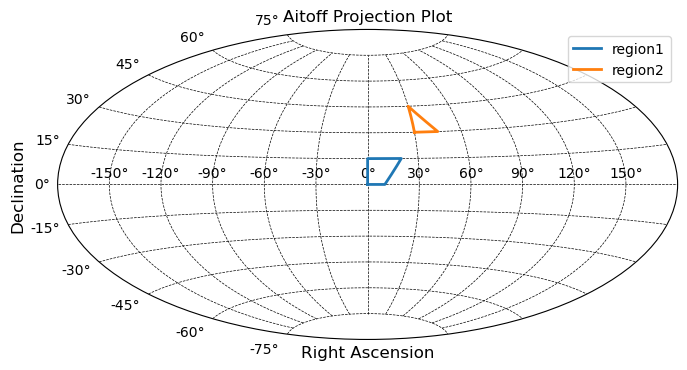

[0, 0, 20, [[...], 15]]

[[0, 0], [0, 15], [20, 15], [[...], 15]]


TypeError: expected str, bytes or os.PathLike object, not NoneType

180.0